In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dfx =  pd.read_csv("../DataSets/WeighedX.csv")
dfy = pd.read_csv("../DataSets/WeightedY.csv")

In [3]:
X = dfx.values
Y = dfy.values

In [4]:
X.shape

(99, 1)

In [5]:
Y.shape

(99, 1)

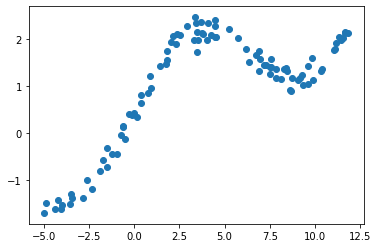

In [6]:
plt.scatter(X,Y)

In [7]:
X = (X-X.mean())/X.std()

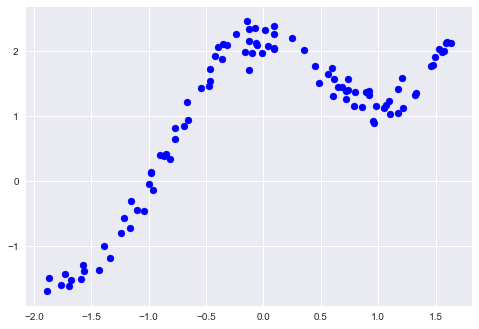

In [8]:
plt.style.use("seaborn")
plt.scatter(X,Y, color="blue")
plt.show()

In [9]:
def getw(query_point, X, tau):
    M= X.shape[0]
    W =  np.mat(np.eye(M))
    for i in range (M):
        xi = X[i]
        x=query_point
        W[i,i] = np.exp(np.dot((xi-x), (xi-x).T)/(-2*(tau**2)))
    return W

In [10]:
Y = np.mat(Y)
X = np.mat(X)
M = X.shape[0]
W = getw(-1, X, 0.5)
W.shape

(99, 99)

In [11]:
W

matrix([[4.37461134e-01, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 9.35741601e-01, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 4.34593282e-01, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.29054046e-01, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 5.78787793e-03, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 5.21221566e-05]])

In [12]:
def predict(X,Y,query_point, tau):
    ones = np.ones((M,1))
    x = np.hstack((X,ones))
    qx = np.mat([query_point, 1])
    W = getw(qx,x,tau)
    theta = np.linalg.pinv(x.T*(W*x))*(x.T*(W*Y))
    pred =  np.dot(qx,theta)
    return theta, pred


In [14]:
theta, pred = predict(X,Y, 1,1)
print(theta)
print(pred)

[[0.14069504]
 [1.45348191]]
[[1.59417694]]


In [35]:
def plotpredict(tau):
    X_test = np.linspace(-2,2,20)
    Y_test = []
    for x in (X_test):
        theta, pred = predict(X,Y,x,tau)
        Y_test.append(pred[0][0])
    Y_test = np.array(Y_test)
    XO=np.array(X)
    YO = np.array(Y)
    plt.title("tau %.2f"%tau)
    plt.scatter(XO,YO)
    plt.scatter(X_test,Y_test, color="red")
    plt.show()
    

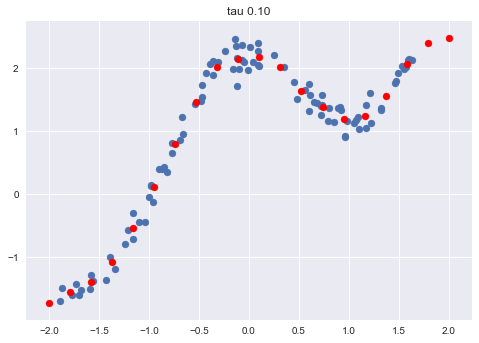

In [36]:
plotpredict(0.1)

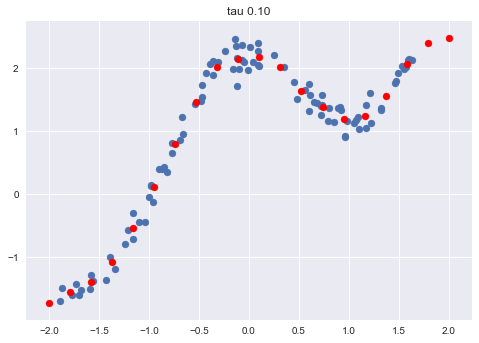

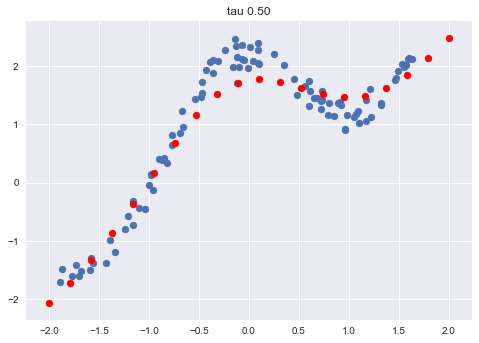

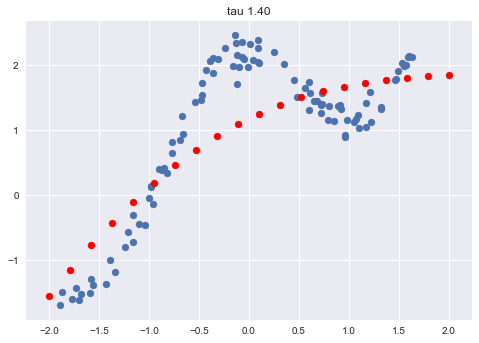

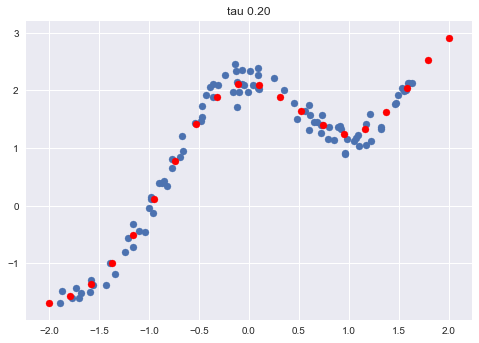

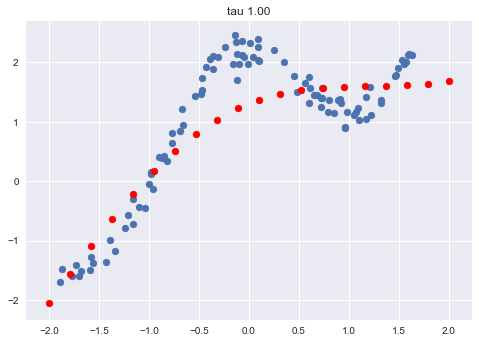

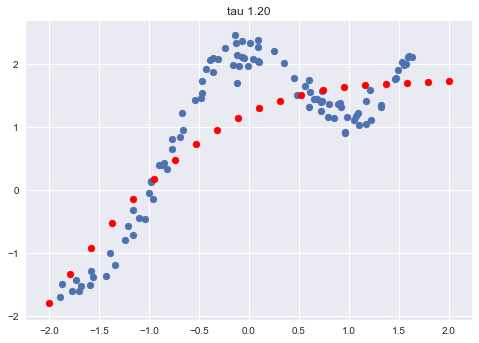

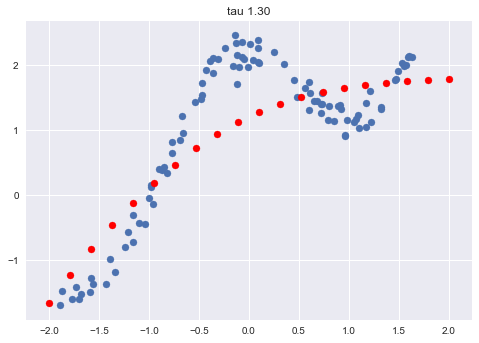

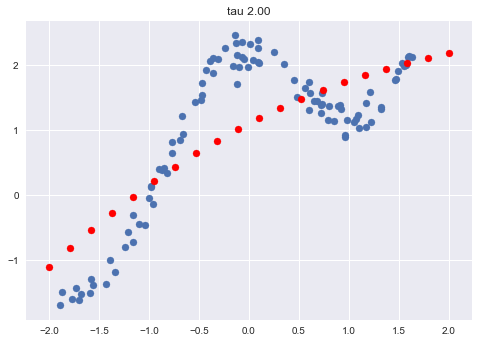

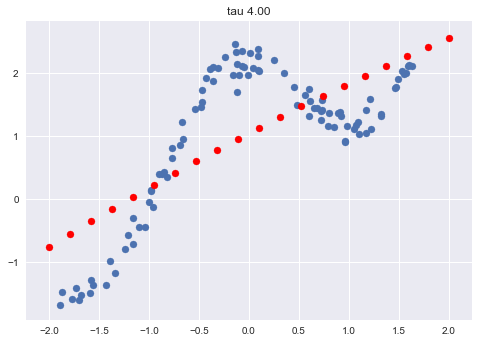

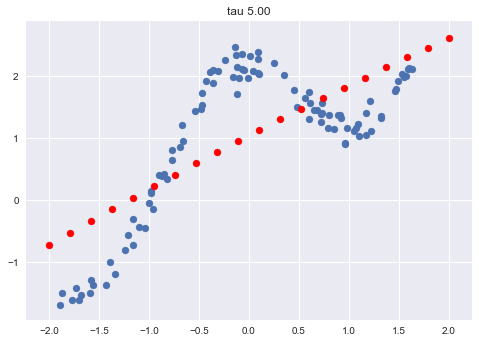

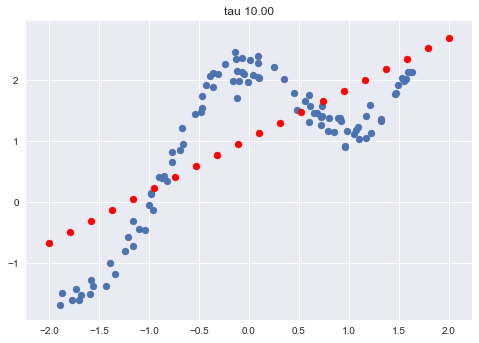

In [37]:
taus = {0.1,0.2,0.5,1,1.4,1.2,1.3,2,4,5,10}
for t in taus:
    plotpredict(t)